## Token Embedding Vector Similarity

In [2]:
import torch, numpy as np, matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity

# DistilBERT 모델 로드 (BERT보다 빠르고 가벼움)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 단어 임베딩 추출 함수 정의
def get_embedding(word):
    tokens = tokenizer(word, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens) # tokens 딕셔너리 언패킹해 토큰 ID 리스트 입력
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 테스트 단어
words = ['king', 'queen', 'cup', 'purple']  
embeddings = [get_embedding(word) for word in words]

similarity_matrix = cosine_similarity(embeddings) # 코사인 유사도 계산

print("Similarity")
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        if i < j:
            print(f"{w1:12s}-{w2:12s}: {similarity_matrix[i,j]:.3f}")

Similarity
king        -queen       : 0.957
king        -cup         : 0.868
king        -purple      : 0.878
queen       -cup         : 0.871
queen       -purple      : 0.891
cup         -purple      : 0.851


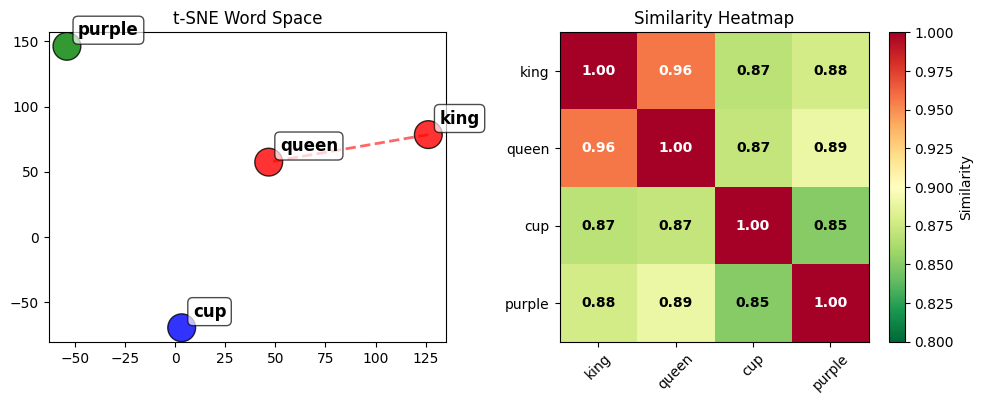

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt, numpy as np

embeddings_array = np.array(embeddings)
plt.figure(figsize=(10, 4))

# 1. t-SNE 2D 시각화
plt.subplot(1, 2, 1)
tsne = TSNE(n_components=2, random_state=123, perplexity=1, learning_rate=100, max_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_array)

colors = ['red', 'red', 'blue', 'green']
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=40, alpha=0.5, edgecolors='black')
plt.plot([embeddings_2d[0,0], embeddings_2d[1,0]], [embeddings_2d[0,1], embeddings_2d[1,1]], 'r--', alpha=0.8, linewidth=2)

for i, word in enumerate(words):
    plt.annotate(word, embeddings_2d[i], xytext=(2, 8), 
                textcoords='offset points', fontsize=10)
plt.title('t-SNE Word Space')

# 2. 유사도 히트맵
plt.subplot(1, 2, 2)
plt.imshow(similarity_matrix, cmap='RdYlGn_r', vmin=0.8, vmax=1.0)
plt.colorbar(label='Similarity')

for i in range(len(words)):
    for j in range(len(words)):
        color = 'white' if similarity_matrix[i, j] > 0.9 else 'black'
        plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', 
                ha='center', va='center', color=color, fontsize=10)

plt.xticks(range(len(words)), words, rotation=45)
plt.yticks(range(len(words)), words)  
plt.title('Similarity Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
# ** 연산자 (딕셔너리 언패킹) 설명

# tokenizer가 반환하는 딕셔너리 구조 확인
tokens = tokenizer('king', return_tensors='pt')
print("tokenizer 반환값:")
print(tokens)
print(f"타입: {type(tokens)}")

print("\n** 연산자의 역할:")
print("• **tokens는 딕셔너리를 키워드 인수로 전개")
print("• model(**tokens)는 다음과 같음:")

# 실제로는 이렇게 동작
print("\n# 원래 방식 (복잡):")
print("model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])")

print("\n# ** 사용 (간단):")
print("model(**tokens)  # 딕셔너리를 자동으로 키워드 인수로 전개")

# 비교 예시
print("\n=== 비교 예시 ===")
def example_function(a, b, c):
    return f"a={a}, b={b}, c={c}"

# 일반적인 방법
data = {'a': 1, 'b': 2, 'c': 3}
print("일반 방법:", example_function(data['a'], data['b'], data['c']))

# ** 언패킹 사용
print("** 언패킹:", example_function(**data))

print("\n✅ **tokens = 딕셔너리의 키-값을 함수 인수로 자동 전달")